In [2]:
#Programa inteligente que aprende a jugar "Yan ken po" con keras
options = ["piedra", "tijeras", "papel"]
def search_winner(p1, p2):
    if p1 == p2:
        result = 0
    elif p1 == "piedra" and p2 == "tijeras":
        result = 1
    elif p1 == "piedra" and p2 == "papel":
        result = 2
    elif p1 == "tijeras" and p2 == "piedra":
        result = 2
    elif p1 == "tijeras" and p2 == "papel":
        result = 1
    elif p1 == "papel" and p2 == "piedra":
        result = 1
    elif p1 == "papel" and p2 == "tijeras":
        result = 2
    return result

search_winner("papel", "tijeras")

2

In [6]:
from random import choice
def get_choice():
    return choice(options)

for i in range(10):
    player1 = get_choice()
    player2 = get_choice()
    print("player1: %s player2: %s Winner: %s " % (
        player1, player2, search_winner(player1, player2)
    ))

player1: piedra player2: tijeras Winner: 1 
player1: tijeras player2: piedra Winner: 2 
player1: piedra player2: tijeras Winner: 1 
player1: tijeras player2: piedra Winner: 2 
player1: piedra player2: piedra Winner: 0 
player1: papel player2: piedra Winner: 1 
player1: papel player2: papel Winner: 0 
player1: papel player2: tijeras Winner: 2 
player1: tijeras player2: piedra Winner: 2 
player1: papel player2: papel Winner: 0 


In [111]:
#vectorizar y crear el dataser con sus clases segun el experto
def str_to_list(option):
    if option=="piedra":
        res = [1,0,0]
    elif option=="tijeras":
        res = [0,1,0]
    else:
        res = [0,0,1]
    return res

data_X = list(map(str_to_list, ["piedra", "tijeras", "papel", "papel"]))
data_y = list(map(str_to_list, ["papel", "piedra", "tijeras", "tijeras"]))
print(data_X)
print(data_y)

[[1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1]]
[[0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 1, 0]]


In [112]:
# cargamos las 4 combinaciones de las compuertas XOR
#training_data = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")

# y estos son los resultados que se obtienen, en el mismo orden
#target_data = np.array([[0],[1],[1],[0]], "float32")

In [113]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(100, activation='relu', input_shape=(3,)))
#model.add(Dense(3, activation='softmax'))

#model.add(Dense(16, input_dim=3, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               400       
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 808       
_________________________________________________________________
dense_44 (Dense)             (None, 3)                 27        
Total params: 1,235
Trainable params: 1,235
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [115]:
#model.fit([data_X], [data_y], batch_size=1, epochs=55)
model.fit([data_X], [data_y], validation_split=0.0001,  
          epochs=1000, batch_size=10, verbose=1)


Train on 3 samples, validate on 1 samples
Epoch 1/1000
3/3 [==============================] - 0s 78ms/step - loss: 0.6747 - accuracy: 0.6667 - val_loss: 0.6487 - val_accuracy: 1.0000
Epoch 2/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6695 - accuracy: 0.7778 - val_loss: 0.6429 - val_accuracy: 1.0000
Epoch 3/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.6644 - accuracy: 0.7778 - val_loss: 0.6377 - val_accuracy: 1.0000
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6597 - accuracy: 0.7778 - val_loss: 0.6320 - val_accuracy: 1.0000
Epoch 5/1000
3/3 [==============================] - 0s 999us/step - loss: 0.6546 - accuracy: 0.7778 - val_loss: 0.6264 - val_accuracy: 1.0000
Epoch 6/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6494 - accuracy: 0.8889 - val_loss: 0.6207 - val_accuracy: 1.0000
Epoch 7/1000
3/3 [==============================] - 0s 667us/step - loss: 0.6444 - accuracy: 0.8889 - val_loss: 

Epoch 59/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4104 - accuracy: 1.0000 - val_loss: 0.3372 - val_accuracy: 1.0000
Epoch 60/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4058 - accuracy: 1.0000 - val_loss: 0.3325 - val_accuracy: 1.0000
Epoch 61/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4012 - accuracy: 1.0000 - val_loss: 0.3280 - val_accuracy: 1.0000
Epoch 62/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3966 - accuracy: 1.0000 - val_loss: 0.3236 - val_accuracy: 1.0000
Epoch 63/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 1.0000 - val_loss: 0.3191 - val_accuracy: 1.0000
Epoch 64/1000
3/3 [==============================] - 0s 662us/step - loss: 0.3875 - accuracy: 1.0000 - val_loss: 0.3146 - val_accuracy: 1.0000
Epoch 65/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 1.0000 - val_loss: 0.3100 - val_accuracy: 1.0000
Epoch 66

Epoch 117/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.1780 - accuracy: 1.0000 - val_loss: 0.1356 - val_accuracy: 1.0000
Epoch 118/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1751 - accuracy: 1.0000 - val_loss: 0.1334 - val_accuracy: 1.0000
Epoch 119/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.1722 - accuracy: 1.0000 - val_loss: 0.1313 - val_accuracy: 1.0000
Epoch 120/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1693 - accuracy: 1.0000 - val_loss: 0.1293 - val_accuracy: 1.0000
Epoch 121/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1664 - accuracy: 1.0000 - val_loss: 0.1272 - val_accuracy: 1.0000
Epoch 122/1000
3/3 [==============================] - 0s 999us/step - loss: 0.1636 - accuracy: 1.0000 - val_loss: 0.1253 - val_accuracy: 1.0000
Epoch 123/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.1609 - accuracy: 1.0000 - val_loss: 0.1233 - val_accuracy:

Epoch 175/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0670 - accuracy: 1.0000 - val_loss: 0.0585 - val_accuracy: 1.0000
Epoch 176/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0659 - accuracy: 1.0000 - val_loss: 0.0577 - val_accuracy: 1.0000
Epoch 177/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0649 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 1.0000
Epoch 178/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.0562 - val_accuracy: 1.0000
Epoch 179/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0628 - accuracy: 1.0000 - val_loss: 0.0555 - val_accuracy: 1.0000
Epoch 180/1000
3/3 [==============================] - 0s 669us/step - loss: 0.0618 - accuracy: 1.0000 - val_loss: 0.0549 - val_accuracy: 1.0000
Epoch 181/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 0.0542 - val_accuracy: 1.0

Epoch 233/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0294 - accuracy: 1.0000 - val_loss: 0.0293 - val_accuracy: 1.0000
Epoch 234/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0291 - accuracy: 1.0000 - val_loss: 0.0290 - val_accuracy: 1.0000
Epoch 235/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 0.0287 - val_accuracy: 1.0000
Epoch 236/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.0284 - accuracy: 1.0000 - val_loss: 0.0284 - val_accuracy: 1.0000
Epoch 237/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 0.0280 - val_accuracy: 1.0000
Epoch 238/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0277 - accuracy: 1.0000 - val_loss: 0.0277 - val_accuracy: 1.0000
Epoch 239/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0274 - accuracy: 1.0000 - val_loss: 0.0275 - val_accuracy: 1.0000
Epoch 

Epoch 291/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0157 - accuracy: 1.0000 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 292/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0156 - accuracy: 1.0000 - val_loss: 0.0164 - val_accuracy: 1.0000
Epoch 293/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0163 - val_accuracy: 1.0000
Epoch 294/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0153 - accuracy: 1.0000 - val_loss: 0.0161 - val_accuracy: 1.0000
Epoch 295/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0152 - accuracy: 1.0000 - val_loss: 0.0160 - val_accuracy: 1.0000
Epoch 296/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0159 - val_accuracy: 1.0000
Epoch 297/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.0157 - val_accuracy: 1.0

Epoch 349/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0105 - val_accuracy: 1.0000
Epoch 350/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 351/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 1.0000
Epoch 352/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 353/1000
3/3 [==============================] - 0s 671us/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0102 - val_accuracy: 1.0000
Epoch 354/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0101 - val_accuracy: 1.0000
Epoch 355/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0100 - val_accuracy: 1.0000

Epoch 407/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0072 - val_accuracy: 1.0000
Epoch 408/1000
3/3 [==============================] - 0s 664us/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 409/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0071 - val_accuracy: 1.0000
Epoch 410/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 411/1000
3/3 [==============================] - 0s 663us/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 1.0000
Epoch 412/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 413/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0

Epoch 465/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 466/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 467/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 468/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 469/1000
3/3 [==============================] - 0s 665us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 470/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 471/1000
3/3 [==============================] - 0s 670us/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 1.0000

Epoch 523/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 524/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 525/1000
3/3 [==============================] - 0s 995us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 526/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 527/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 528/1000
3/3 [==============================] - 0s 995us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 529/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Ep

Epoch 581/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 582/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 583/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 584/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 585/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 586/1000
3/3 [==============================] - 0s 668us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 587/1000
3/3 [==============================] - 0s 669us/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.000

Epoch 639/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 640/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 641/1000
3/3 [==============================] - 0s 669us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 642/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 643/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 644/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 645/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0024 - val_accurac

Epoch 696/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 697/1000
3/3 [==============================] - 0s 671us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 698/1000
3/3 [==============================] - 0s 670us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 699/1000
3/3 [==============================] - 0s 671us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 700/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 701/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 702/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 

Epoch 754/1000
3/3 [==============================] - 0s 996us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 755/1000
3/3 [==============================] - 0s 669us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 756/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 757/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 758/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 759/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 760/1000
3/3 [==============================] - 0s 671us/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy

Epoch 812/1000
3/3 [==============================] - 0s 994us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 813/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 814/1000
3/3 [==============================] - 0s 994us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 815/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 816/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 817/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 818/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000


Epoch 870/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 871/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 872/1000
3/3 [==============================] - 0s 666us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 873/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 874/1000
3/3 [==============================] - 0s 999us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 875/1000
3/3 [==============================] - 0s 997us/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 876/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0

Epoch 927/1000
3/3 [==============================] - 0s 999us/step - loss: 9.4597e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 928/1000
3/3 [==============================] - 0s 1ms/step - loss: 9.4365e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 929/1000
3/3 [==============================] - 0s 667us/step - loss: 9.4137e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 930/1000
3/3 [==============================] - 0s 810us/step - loss: 9.3910e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 931/1000
3/3 [==============================] - 0s 995us/step - loss: 9.3683e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 932/1000
3/3 [==============================] - 0s 995us/step - loss: 9.3455e-04 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 933/1000
3/3 [==============================] - 0s 669us/step - loss: 9.3230e-04 - accuracy: 1.0000 - val_lo

Epoch 982/1000
3/3 [==============================] - 0s 1ms/step - loss: 8.3076e-04 - accuracy: 1.0000 - val_loss: 9.4447e-04 - val_accuracy: 1.0000
Epoch 983/1000
3/3 [==============================] - 0s 1ms/step - loss: 8.2885e-04 - accuracy: 1.0000 - val_loss: 9.4240e-04 - val_accuracy: 1.0000
Epoch 984/1000
3/3 [==============================] - 0s 1ms/step - loss: 8.2696e-04 - accuracy: 1.0000 - val_loss: 9.4031e-04 - val_accuracy: 1.0000
Epoch 985/1000
3/3 [==============================] - 0s 1ms/step - loss: 8.2508e-04 - accuracy: 1.0000 - val_loss: 9.3815e-04 - val_accuracy: 1.0000
Epoch 986/1000
3/3 [==============================] - 0s 1ms/step - loss: 8.2318e-04 - accuracy: 1.0000 - val_loss: 9.3600e-04 - val_accuracy: 1.0000
Epoch 987/1000
3/3 [==============================] - 0s 663us/step - loss: 8.2130e-04 - accuracy: 1.0000 - val_loss: 9.3384e-04 - val_accuracy: 1.0000
Epoch 988/1000
3/3 [==============================] - 0s 1ms/step - loss: 8.1944e-04 - accuracy: 1

In [116]:
model.history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

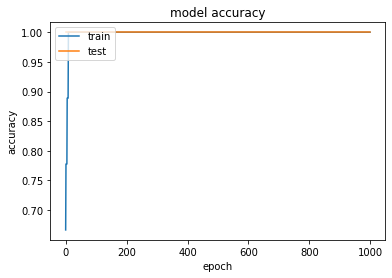

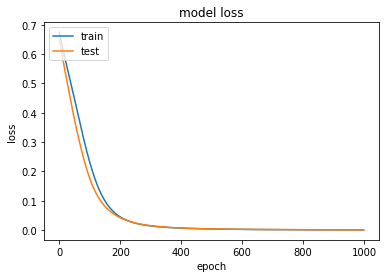

In [117]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [118]:
test_eval = model.evaluate([data_X], [data_y], verbose=1)

4/4 [==============================] - 0s 496us/step


In [119]:
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.0008235351415351033
Test accuracy: 1.0


In [122]:
print(model.predict([[str_to_list("piedra")]]) ) # [1, 0, 0]
print(model.predict([[str_to_list("tijeras")]])) # [0, 1, 0]
print(model.predict([[str_to_list("papel")]])  ) # [0, 0, 1]

[[7.4951496e-04 1.1707977e-03 9.9956828e-01]]
[[9.9954659e-01 1.0413433e-03 5.9097004e-04]]
[[3.2086583e-04 9.9825352e-01 6.5232022e-04]]
